# **README**
We have two 'ipynb' files. One file has the GPT-2 model, and the other file (this one) contains all of our python code, in order ready to run with the labeled files in our drive. You can run GPT-2 with the files generated in this code (Trump_YEAR_FineTuned and ModiTweets_YEAR_FINAL). This code will generate all cleaned datasets, analysis of these datasets, and visuals based on the analysis. We included all necessary installs and imports to run this code in this file

In [0]:
!pip3 install emoji

**Modi Tweet Scraper**

In [0]:
#==============================#
# INSTALLS AND IMPORTS
#==============================#
!pip3 install langdetect
from langdetect import detect
import pandas as pd

#==============================#
# OPEN DATASET AND CREATE ARRAYS
#==============================#
data = pd.read_csv('narendramodi.csv')
tweets2016 = []
tweets2017 = []
tweets2018 = []
tweets2019 = []

#==============================#
# LOOP THROUGH DATA AND ADD 
# TWEETS TO APPROPRIATE LIST
#==============================#
for i in data.index:
  date = data.iloc[i, 3]
  year = date[:4]
  tweet = data.iloc[i, 10]
  try:
    if detect(tweet) == 'en':
      flag = False
      valid_chars = {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
                     'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
                     'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
                     'y', 'z'}
      toLower = tweet.lower()
      for char in toLower:
        if char.isalpha():
          if char not in valid_chars:
            flag = True
            break
      if flag:
        continue
      if year == '2019':
        tweets2019.append(tweet)
      elif year == '2018':
        tweets2018.append(tweet)
      elif year == '2017':
        tweets2017.append(tweet)
      elif year == '2016':
        tweets2016.append(tweet)
      else:
        break
  except:
    continue

#==============================#
# OPEN FILES TO ADD TWEETS
#==============================#
modi2016fd = open('ModiTweets2016FINAL.txt', 'w+')
modi2017fd = open('ModiTweets2017FINAL.txt', 'w+')
modi2018fd = open('ModiTweets2018FINAL.txt', 'w+')
modi2019fd = open('ModiTweets2019FINAL.txt', 'w+')

#==============================#
# CLEAN UP TWEETS AND ADD THEM
# TO THE FILES
#==============================#
for tweet in tweets2016:
  index1 = tweet.find('http')
  while index1 != -1:
    index2 = tweet.find(' ', index1)
    if index2 == -1:
      index2 = len(tweet)
    tweet = tweet[:index1] + tweet[index2:]
    index1 = tweet.find('http')
  index1 = tweet.find('pic.twitter.com')
  while index1 != -1:
    index2 = tweet.find(' ', index1)
    if index2 == -1:
      index2 = len(tweet)
    tweet = tweet[:index1] + tweet[index2 + 1:]
    index1 = tweet.find('pic.twitter.com')
  modi2016fd.write(tweet + '\n\n')
for tweet in tweets2017:
  index1 = tweet.find('http')
  while index1 != -1:
    index2 = tweet.find(' ', index1)
    if index2 == -1:
      index2 = len(tweet)
    tweet = tweet[:index1] + tweet[index2 + 1:]
    index1 = tweet.find('http')
  index1 = tweet.find('pic.twitter.com')
  while index1 != -1:
    index2 = tweet.find(' ', index1)
    if index2 == -1:
      index2 = len(tweet)
    tweet = tweet[:index1] + tweet[index2 + 1:]
    index1 = tweet.find('pic.twitter.com')
  modi2017fd.write(tweet + '\n\n')
for tweet in tweets2018:
  index1 = tweet.find('http')
  while index1 != -1:
    index2 = tweet.find(' ', index1)
    if index2 == -1:
      index2 = len(tweet)
    tweet = tweet[:index1] + tweet[index2 + 1:]
    index1 = tweet.find('http')
  index1 = tweet.find('pic.twitter.com')
  while index1 != -1:
    index2 = tweet.find(' ', index1)
    if index2 == -1:
      index2 = len(tweet)
    tweet = tweet[:index1] + tweet[index2 + 1:]
    index1 = tweet.find('pic.twitter.com')
  modi2018fd.write(tweet + '\n\n')
for tweet in tweets2019:
  index1 = tweet.find('http')
  while index1 != -1:
    index2 = tweet.find(' ', index1)
    if index2 == -1:
      index2 = len(tweet)
    tweet = tweet[:index1] + tweet[index2 + 1:]
    index1 = tweet.find('http')
  index1 = tweet.find('pic.twitter.com')
  while index1 != -1:
    index2 = tweet.find(' ', index1)
    if index2 == -1:
      index2 = len(tweet)
    tweet = tweet[:index1] + tweet[index2 + 1:]
    index1 = tweet.find('pic.twitter.com')
  modi2019fd.write(tweet + '\n\n')
  
#==============================#
# CLOSE ALL FILES
#==============================# 
modi2016fd.close()
modi2017fd.close()
modi2018fd.close()
modi2019fd.close()

In [0]:
import numpy as np
import pandas as pd
import csv
import sys
import emoji
import re

# ==============================================================
# Filter TRUMP 2016 TWEETS
# ==============================================================

def removeEmoji(text):
    new_text = re.sub(emoji.get_emoji_regexp(), r"", text)
    return new_text

fd = open("2016TrumpTweets.txt", 'r')
fd2 = open("Trump2016FineTuned", 'a')

tweets = (fd.readlines())

count = 0
for item in tweets:
  count += 1

  item = removeEmoji(item)
  index = item.find('&amp')

  while(index != -1):
    item = item[:index + 1] + item[index + 5:]
    index = item.find('&amp')

  index = item.find('http')
  while(index != -1):
    endURLIndex = item.find(' ', index)
    if endURLIndex == -1:
      endURLIndex = len(item)
    item = item[:index] + item[endURLIndex + 1:]
    index = item.find('http')

  item = item.strip()

  if(item.startswith("...") or item.endswith("...\"") or item.endswith("...\n") or item.endswith("...\w") or item.endswith("…") or item.endswith("…\"")):
    continue
  fd2.write(item + "\n\n")  
fd.close()
fd2.close()  



In [0]:
import numpy as np
import pandas as pd
import csv
import sys
import emoji
import re

# ==============================================================
# Filter TRUMP 2017 TWEETS
# ==============================================================

def removeEmoji(text):
    new_text = re.sub(emoji.get_emoji_regexp(), r"", text)
    return new_text

fd = open("2017TrumpTweets.txt", 'r')
fd2 = open("Trump2017FineTuned", 'a')

tweets = (fd.readlines())

count = 0
for item in tweets:
  count += 1

  item = removeEmoji(item)
  index = item.find('&amp')

  while(index != -1):
    item = item[:index + 1] + item[index + 5:]
    index = item.find('&amp')

  index = item.find('http')
  while(index != -1):
    endURLIndex = item.find(' ', index)
    if endURLIndex == -1:
      endURLIndex = len(item)
    item = item[:index] + item[endURLIndex + 1:]
    index = item.find('http')

  item = item.strip()

  if(item.startswith("...") or item.endswith("...") or item.endswith("...\"") or item.endswith("...\n") or item.endswith("...\w") or item.endswith("…") or item.endswith("…\"")):
    continue
  fd2.write(item + "\n\n")
fd.close()
fd2.close()

In [0]:
import numpy as np
import pandas as pd
import csv
import sys
import emoji
import re

# ==============================================================
# Filter TRUMP 2018 TWEETS
# ==============================================================

def removeEmoji(text):
    new_text = re.sub(emoji.get_emoji_regexp(), r"", text)
    return new_text

fd = open("2018TrumpTweets.txt", 'r')
fd2 = open("Trump2018FineTuned", 'a')

tweets = (fd.readlines())

count = 0
for item in tweets:
  count += 1

  item = removeEmoji(item)
  index = item.find('&amp')

  while(index != -1):
    item = item[:index + 1] + item[index + 5:]
    index = item.find('&amp')

  index = item.find('http')
  while(index != -1):
    endURLIndex = item.find(' ', index)
    if endURLIndex == -1:
      endURLIndex = len(item)
    item = item[:index] + item[endURLIndex + 1:]
    index = item.find('http')

  item = item.strip()

  if(item.startswith("...") or item.endswith("...") or item.endswith("...\"") or item.endswith("...\n") or item.endswith("...\w") or item.endswith("…") or item.endswith("…\"")):
    continue
  fd2.write(item + "\n\n")
fd.close()
fd2.close()

In [0]:
import numpy as np
import pandas as pd
import csv
import sys
import emoji
import re

# ==============================================================
# Filter TRUMP 2019 TWEETS
# ==============================================================

def removeEmoji(text):
    new_text = re.sub(emoji.get_emoji_regexp(), r"", text)
    return new_text

fd = open("2019TrumpTweets.txt", 'r')
fd2 = open("Trump2019FineTuned", 'a')

tweets = (fd.readlines())

count = 0
for item in tweets:
  count += 1

  item = removeEmoji(item)
  index = item.find('&amp')

  while(index != -1):
    item = item[:index + 1] + item[index + 5:]
    index = item.find('&amp')

  index = item.find('http')
  while(index != -1):
    endURLIndex = item.find(' ', index)
    if endURLIndex == -1:
      endURLIndex = len(item)
    item = item[:index] + item[endURLIndex + 1:]
    index = item.find('http')

  item = item.strip()

  if(item.startswith("...") or item.startswith("RT") or item.endswith("...") or item.endswith("...\"") or item.endswith("...\n") or item.endswith("...\w") or item.endswith("…") or item.endswith("…\"")):
    continue
  fd2.write(item + "\n\n")
fd.close()
fd2.close()

In [0]:
import numpy as np
import pandas as pd
import csv
import sys
import matplotlib.pyplot as plt
import nltk
from collections import Counter 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#==================================================
#    Finding Most common 10 words TRUMP REAL 
#==================================================
nltk.download('stopwords')
nltk.download('punkt')

fd2016 = open('Trump2016FineTuned','r')
fd2017 = open('Trump2017FineTuned','r')
fd2018 = open('Trump2018FineTuned','r')
fd2019 = open('Trump2019FineTuned','r')

tweets2016 = (fd2016.readlines())
tweets2017 = (fd2017.readlines())
tweets2018 = (fd2018.readlines())
tweets2019 = (fd2019.readlines())

data_set = ""
for tweet in tweets2016:
  data_set += tweet
for tweet in tweets2017:
  data_set += tweet
for tweet in tweets2018:
  data_set += tweet
for tweet in tweets2019:
  data_set += tweet

stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(data_set) 

filtered_sentence = [] 

for w in word_tokens:
  words = w.lower()
  if words not in stop_words:
      if(words.isalnum()):
        filtered_sentence.append(words)

filtered_list = [word for word in filtered_sentence if len(word) > 1]
Counter = Counter(filtered_list)
TrumpRealmost_occur = Counter.most_common(10) 
print(TrumpRealmost_occur)
print(len(filtered_list))
fd2016.close()
fd2017.close()
fd2018.close()
fd2019.close()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('great', 4998), ('thank', 2492), ('people', 2272), ('trump', 1834), ('president', 1632), ('big', 1572), ('country', 1496), ('america', 1446), ('news', 1440), ('democrats', 1334)]
296264


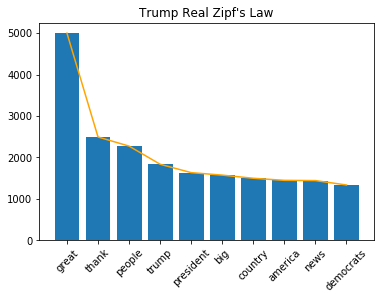

In [0]:
#Creating real Graphs for REAL TRUMP 
tuples = TrumpRealmost_occur
x = np.arange(len(tuples))
values = [tup[1] for tup in tuples]
fig, ax = plt.subplots()
plt.bar(x, values)
plt.title('Trump Real Zipf\'s Law')
plt.plot(values, color='orange')
plt.xticks(x, [tup[0] for tup in tuples])
plt.xticks(rotation=45)
plt.savefig('TrumpRealZipGraph')
plt.show()

In [0]:
import numpy as np
import pandas as pd
import csv
import sys
import matplotlib.pyplot as plt
import nltk
import numpy as np
from matplotlib.ticker import FuncFormatter
from collections import Counter 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
#==================================================
#    Finding Most common 10 words MODI REAL 
#==================================================

nltk.download('stopwords')
nltk.download('punkt')

fdM2016 = open('ModiTweets2016FINAL.txt','r')
fdM2017 = open('ModiTweets2017FINAL.txt','r')
fdM2018 = open('ModiTweets2018FINAL.txt','r')
fdM2019 = open('ModiTweets2019FINAL.txt','r')

Mtweets2016 = (fdM2016.readlines())
Mtweets2017 = (fdM2017.readlines())
Mtweets2018 = (fdM2018.readlines())
Mtweets2019 = (fdM2019.readlines())

data_set = ""
for tweet in Mtweets2016:
  data_set += tweet
for tweet in Mtweets2017:
  data_set += tweet
for tweet in Mtweets2018:
  data_set += tweet
for tweet in Mtweets2019:
  data_set += tweet

stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(data_set) 

filtered_sentence = [] 

for w in word_tokens:
  words = w.lower()
  if words not in stop_words:
      if(words.isalnum()):
        filtered_sentence.append(words)

filtered_list = [word for word in filtered_sentence if len(word) > 1]

Counter = Counter(filtered_list)
most_occur = Counter.most_common(10) 
print(most_occur)
print(len(filtered_list))
fdM2016.close()
fdM2017.close()
fdM2018.close()
fdM2019.close()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('india', 1856), ('people', 941), ('today', 606), ('ji', 578), ('also', 474), ('development', 435), ('thank', 429), ('government', 427), ('wishes', 422), ('towards', 418)]
110106


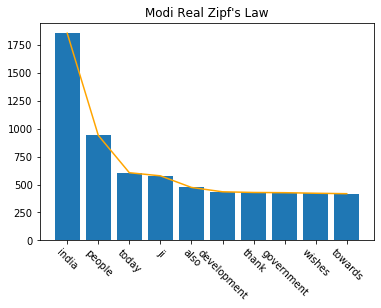

In [0]:
#Creating the most common words graph REAL MODI
tuples = most_occur
x = np.arange(len(tuples))
values = [tup[1] for tup in tuples]
fig, ax = plt.subplots()
plt.bar(x, values)
plt.title('Modi Real Zipf\'s Law')
plt.plot(values, color='orange')
plt.xticks(x, [tup[0] for tup in tuples])
plt.xticks(rotation= -45)
plt.savefig('ModiRealZipGraph')
plt.show()


In [0]:
import numpy as np
import pandas as pd
import csv
import sys
import matplotlib.pyplot as plt
import nltk
import numpy as np
from matplotlib.ticker import FuncFormatter
from collections import Counter 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
#==================================================
#    Finding Most common 10 words MODI FAKE 
#==================================================

nltk.download('stopwords')
nltk.download('punkt')

fdM2016 = open('ModiTweets2016FAKE_COMBINED.txt','r')
fdM2017 = open('ModiTweets2017FAKE_COMBINED.txt','r')
fdM2018 = open('ModiTweets2018FAKE_COMBINED.txt','r')
fdM2019 = open('ModiTweets2019FAKE_COMBINED.txt','r')

Mtweets2016 = (fdM2016.readlines())
Mtweets2017 = (fdM2017.readlines())
Mtweets2018 = (fdM2018.readlines())
Mtweets2019 = (fdM2019.readlines())

data_set = ""
for tweet in Mtweets2016:
  data_set += tweet
for tweet in Mtweets2017:
  data_set += tweet
for tweet in Mtweets2018:
  data_set += tweet
for tweet in Mtweets2019:
  data_set += tweet

stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(data_set) 

filtered_sentence = [] 

for w in word_tokens:
  words = w.lower()
  if words not in stop_words:
      if(words.isalnum()):
        filtered_sentence.append(words)

filtered_list = [word for word in filtered_sentence if len(word) > 1]

Counter = Counter(filtered_list)
most_occur = Counter.most_common(10) 
print(most_occur)
print(len(filtered_list))
fdM2016.close()
fdM2017.close()
fdM2018.close()
fdM2019.close()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('india', 3352), ('people', 2494), ('thank', 1538), ('president', 1214), ('ties', 1137), ('development', 1073), ('also', 1017), ('government', 954), ('bjp', 903), ('nation', 869)]
193323


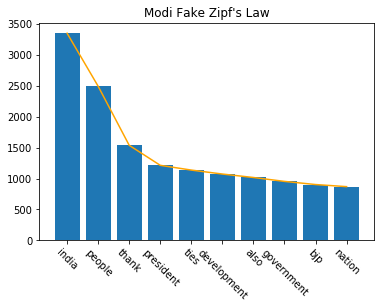

In [0]:
#Creating the most common words graph FAKE MODI
tuples = most_occur
x = np.arange(len(tuples))
values = [tup[1] for tup in tuples]
fig, ax = plt.subplots()
plt.bar(x, values)
plt.title('Modi Fake Zipf\'s Law')
plt.plot(values, color= 'orange')
plt.xticks(x, [tup[0] for tup in tuples])
plt.xticks(rotation= -45)
plt.savefig('ModiFakeZipGraph')
plt.show()

In [0]:
import numpy as np
import pandas as pd
import csv
import sys
import matplotlib.pyplot as plt
import nltk
import numpy as np
from matplotlib.ticker import FuncFormatter
from collections import Counter 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
#==================================================
#    Finding Most common 10 words TRUMP FAKE 
#==================================================

nltk.download('stopwords')
nltk.download('punkt')

fdM2016 = open('TrumpTweets2016FAKE_COMBINED.txt','r')
fdM2017 = open('TrumpTweets2017FAKE_COMBINED.txt','r')
fdM2018 = open('TrumpTweets2018FAKE_COMBINED.txt','r')
fdM2019 = open('TrumpTweets2019FAKE_COMBINED.txt','r')

Mtweets2016 = (fdM2016.readlines())
Mtweets2017 = (fdM2017.readlines())
Mtweets2018 = (fdM2018.readlines())
Mtweets2019 = (fdM2019.readlines())

data_set = ""
for tweet in Mtweets2016:
  data_set += tweet
for tweet in Mtweets2017:
  data_set += tweet
for tweet in Mtweets2018:
  data_set += tweet
for tweet in Mtweets2019:
  data_set += tweet

stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(data_set) 

filtered_sentence = [] 

for w in word_tokens:
  words = w.lower()
  if words not in stop_words:
      if(words.isalnum()):
        filtered_sentence.append(words)

filtered_list = [word for word in filtered_sentence if len(word) > 1]

Counter = Counter(filtered_list)
most_occur = Counter.most_common(10) 
print(most_occur)
print(len(filtered_list))
fdM2016.close()
fdM2017.close()
fdM2018.close()
fdM2019.close()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('great', 2294), ('people', 1420), ('thank', 1172), ('trump', 1007), ('country', 854), ('many', 795), ('president', 733), ('news', 714), ('democrats', 695), ('media', 671)]
140535


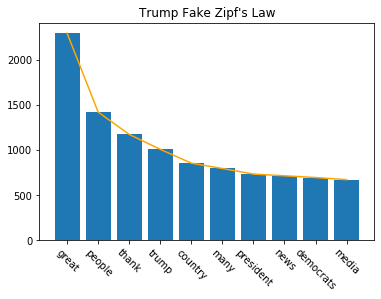

In [0]:
#Creating the most common words graph FAKE TRUMP
tuples = most_occur
x = np.arange(len(tuples))
values = [tup[1] for tup in tuples]
fig, ax = plt.subplots()
plt.bar(x, values)
plt.title('Trump Fake Zipf\'s Law')
plt.plot(values, color= 'orange')
plt.xticks(x, [tup[0] for tup in tuples])
plt.xticks(rotation= -45)
plt.savefig('TrumpFakeZipGraph')
plt.show()

In [0]:
import numpy as np
import pandas as pd
import csv
import sys
import matplotlib.pyplot as plt
import nltk
from collections import Counter 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#==================================================
#     Print top 20 hashtags TRUMP REAL 
#==================================================
nltk.download('stopwords')
nltk.download('punkt')

fd2016 = open('Trump2016FineTuned','r')
fd2017 = open('Trump2017FineTuned','r')
fd2018 = open('Trump2018FineTuned','r')
fd2019 = open('Trump2019FineTuned','r')

tweets2016 = (fd2016.readlines())
tweets2017 = (fd2017.readlines())
tweets2018 = (fd2018.readlines())
tweets2019 = (fd2019.readlines())

data_set = ""
for tweet in tweets2016:
  data_set += tweet
for tweet in tweets2017:
  data_set += tweet
for tweet in tweets2018:
  data_set += tweet
for tweet in tweets2019:
  data_set += tweet

tokens = data_set.split()

hashtags = []
for x in tokens:
  if(x.startswith("#")): 
    hashtags.append(x)
#print("hastags= ", hashtags)

Counter = Counter(hashtags)
most_occur = Counter.most_common(20)
print(most_occur) 

fd2016.close()
fd2017.close()
fd2018.close()
fd2019.close()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('#Trump2016', 534), ('#MAGA', 404), ('#MakeAmericaGreatAgain', 260), ('#AmericaFirst', 120), ('#VoteTrump', 120), ('#DrainTheSwamp', 98), ('#ImWithYou', 96), ('#BigLeagueTruth', 70), ('#CrookedHillary', 62), ('#USA', 56), ('#Debate', 54), ('#FITN', 46), ('#MakeAmericaGreatAgain!', 44), ('#TrumpPence16', 44), ('#KAG2020', 36), ('#TrumpTrain', 34), ('#1', 32), ('#GOPDebate', 32), ('#IACaucus', 32), ('#RNCinCLE', 28)]


In [0]:
import numpy as np
import pandas as pd
import csv
import sys
import matplotlib.pyplot as plt
import nltk
import numpy as np
from matplotlib.ticker import FuncFormatter
from collections import Counter 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
#==================================================
#    Prints Top 20 Hashtags MODI REAL 
#==================================================

nltk.download('stopwords')
nltk.download('punkt')

fdM2016 = open('ModiTweets2016FINAL.txt','r')
fdM2017 = open('ModiTweets2017FINAL.txt','r')
fdM2018 = open('ModiTweets2018FINAL.txt','r')
fdM2019 = open('ModiTweets2019FINAL.txt','r')

Mtweets2016 = (fdM2016.readlines())
Mtweets2017 = (fdM2017.readlines())
Mtweets2018 = (fdM2018.readlines())
Mtweets2019 = (fdM2019.readlines())

data_set = ""
for tweet in Mtweets2016:
  data_set += tweet
for tweet in Mtweets2017:
  data_set += tweet
for tweet in Mtweets2018:
  data_set += tweet
for tweet in Mtweets2019:
  data_set += tweet

tokens = data_set.split()

hashtags = []
for x in tokens:
  if(x.startswith("#")):
    hashtags.append(x)
#print("hastags= ", hashtags)

#For hashtags
Counter = Counter(hashtags)
#Specify Number of most common wanted  
most_occur = Counter.most_common(20)
print(most_occur) 
fdM2016.close()
fdM2017.close()
fdM2018.close()
fdM2019.close()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('#MannKiBaat', 252), ('#Gandhi150', 86), ('#AsianGames2018', 76), ('#TirangaYatra', 59), ('#MannKiBaat.', 51), ('#YogaDay', 40), ('#TransformingIndia', 30), ('#MyCleanIndia', 24), ('#MannKiBaat,', 19), ('#TransformingIndia.', 19), ('#SwachhataHiSeva', 17), ('#FitIndia', 17), ('#4thYogaDay', 16), ('#Rio2016', 13), ('#IDY2016', 13), ('#SHS18', 13), ('#VoteKar', 13), ('#IncredibleIndia', 12), ('#IndependenceDayIndia', 11), ('#MannKiBaat50', 8)]


In [0]:
import numpy as np
import pandas as pd
import csv
import sys
import matplotlib.pyplot as plt
import nltk
import numpy as np
from matplotlib.ticker import FuncFormatter
from collections import Counter 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
#==================================================
#    Prints top 20 Hashtags TRUMP FAKE 
#==================================================

nltk.download('stopwords')
nltk.download('punkt')

fdM2016 = open('TrumpTweets2016FAKE_COMBINED.txt','r')
fdM2017 = open('TrumpTweets2017FAKE_COMBINED.txt','r')
fdM2018 = open('TrumpTweets2018FAKE_COMBINED.txt','r')
fdM2019 = open('TrumpTweets2019FAKE_COMBINED.txt','r')

Mtweets2016 = (fdM2016.readlines())
Mtweets2017 = (fdM2017.readlines())
Mtweets2018 = (fdM2018.readlines())
Mtweets2019 = (fdM2019.readlines())

data_set = ""
for tweet in Mtweets2016:
  data_set += tweet
for tweet in Mtweets2017:
  data_set += tweet
for tweet in Mtweets2018:
  data_set += tweet
for tweet in Mtweets2019:
  data_set += tweet

tokens = data_set.split()

hashtags = []
for x in tokens:
  if(x.startswith("#")):
    hashtags.append(x)
#print("hastags= ", hashtags)

#For hashtags
Counter = Counter(hashtags)
#Specify Number of most common wanted  
most_occur = Counter.most_common(20)
print(most_occur) 
fdM2016.close()
fdM2017.close()
fdM2018.close()
fdM2019.close()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('#Trump2016', 300), ('#MakeAmericaGreatAgain', 253), ('#VoteTrump', 114), ('#MAGA', 108), ('#ImWithYou', 35), ('#TrumpPence16', 34), ('#Obamacare', 26), ('#ObamacareFail', 24), ('#1', 23), ('#MakeAmericaGreatAgain"', 22), ('#USWomensOpen', 21), ('#VoteTrumpNV', 20), ('#JointSession', 18), ('#JointAddress', 18), ('#AmericaFirst', 17), ('#IACaucus', 15), ('#ICYMI:', 15), ('#USA', 14), ('#Trump2016#MakeAmericaGreatAgain', 12), ('#Trump2016"', 12)]


In [0]:
import numpy as np
import pandas as pd
import csv
import sys
import matplotlib.pyplot as plt
import nltk
import numpy as np
from matplotlib.ticker import FuncFormatter
from collections import Counter 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
#==================================================
#       Printing top 20 hashtags MODI FAKE 
#==================================================

nltk.download('stopwords')
nltk.download('punkt')

fdM2016 = open('ModiTweets2016FAKE_COMBINED.txt','r')
fdM2017 = open('ModiTweets2017FAKE_COMBINED.txt','r')
fdM2018 = open('ModiTweets2018FAKE_COMBINED.txt','r')
fdM2019 = open('ModiTweets2019FAKE_COMBINED.txt','r')

Mtweets2016 = (fdM2016.readlines())
Mtweets2017 = (fdM2017.readlines())
Mtweets2018 = (fdM2018.readlines())
Mtweets2019 = (fdM2019.readlines())

data_set = ""
for tweet in Mtweets2016:
  data_set += tweet
for tweet in Mtweets2017:
  data_set += tweet
for tweet in Mtweets2018:
  data_set += tweet
for tweet in Mtweets2019:
  data_set += tweet

tokens = data_set.split()

hashtags = []
for x in tokens:
  if(x.startswith("#")):
    hashtags.append(x)
#print("hastags= ", hashtags)

#For hashtags
Counter = Counter(hashtags)
#Specify Number of most common wanted  
most_occur = Counter.most_common(20)
print(most_occur) 
fdM2016.close()
fdM2017.close()
fdM2018.close()
fdM2019.close()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('#MannKiBaat', 256), ('#TirangaYatra', 172), ('#MainBhiChowkidar', 83), ('#TransformingIndia', 72), ('#Rio2016', 71), ('#MannKiBaat.', 64), ('#TransformingIndia.', 53), ('#MyCleanIndia', 47), ('#MannKiBaat,', 39), ('#VoteKar', 34), ('#ARCActionedTeams', 24), ('#WorldHealthDay', 24), ('#SwamiVivekananda', 23), ('#MainBhiChowkidar.', 22), ('#IDY2016', 20), ('#AsianGames2018', 17), ('#VoteKar.', 17), ('#MyCleanIndia.', 16), ('#Paralympics,', 16), ('#ETGBS', 15)]


**Text Analysis**

In [0]:
#==============================#
# INSTALLS AND IMPORTS
#==============================#
!pip3 install textstat
from textblob import TextBlob
import numpy as np
import pandas as pd
import textstat
import nltk
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#==============================#
# TRUMP REAL ANALYSIS LOOP
#==============================#
for i in range(2016, 2020):
  #==============================#
  # OPEN TXT AND CREATE ARRAYS
  #==============================#
  FILENAME = 'Trump' + str(i) + 'FineTuned'
  tweetFile = open(FILENAME, 'r')
  fileContent = tweetFile.readlines()
  sentimentScores = []
  readabilityScores = []
  gradeLevelScores = []
  lines = []

  #==============================#
  # FILTER OUT NONSENSICAL FAKE 
  # TWEETS AND RUN ANALYSIS
  # ALGORITHMS ON EACH TWEET
  #==============================#
  for line in fileContent:
    if not line.isspace() and not '=====' in line:
      word_tokens = word_tokenize(line) 
      filtered_sentence = [w for w in word_tokens if not w in stop_words] 
      filtered_sentence = [] 
      for w in word_tokens: 
        if w not in stop_words: 
          filtered_sentence.append(w)
      newLine = ' '.join(filtered_sentence)
      sentiment = TextBlob(newLine).sentiment
      if sentiment.polarity > 1 or sentiment.polarity < -1:
        continue
      grade = textstat.flesch_kincaid_grade(newLine)
      if grade < 0 or grade > 20:
        continue
      readability = textstat.flesch_reading_ease(line)
      if readability < 0 or readability > 100:
        continue
      gradeLevelScores.append(grade)
      sentimentScores.append(sentiment.polarity)
      readabilityScores.append(readability)
      lines.append(line)

  #==============================#
  # CREATE DATAFRAME OF TWEETS
  # WITH ANALYSIS VALUES AND
  # OUTPUT TO CSV
  #==============================#
  data = {'Sentiment': np.asarray(sentimentScores),
          'Readability': np.asarray(readabilityScores),
          'Grade Level': np.asarray(gradeLevelScores)}
  df = pd.DataFrame(data, index=lines)
  df.loc['mean'] = df.mean()
  df.to_csv('TrumpTweets' + str(i) + 'Analysis_REAL.csv')
tweetFile.close()
#==============================#
# TRUMP FAKE ANALYSIS LOOP
#==============================#
for i in range(2016, 2020):
  #==============================#
  # OPEN TXT AND CREATE ARRAYS
  #==============================#
  FILENAME = 'TrumpTweets' + str(i) + 'FAKE_COMBINED.txt'
  tweetFile = open(FILENAME, 'r')
  fileContent = tweetFile.readlines()
  sentimentScores = []
  readabilityScores = []
  gradeLevelScores = []
  lines = []

  #==============================#
  # FILTER OUT NONSENSICAL FAKE 
  # TWEETS AND RUN ANALYSIS
  # ALGORITHMS ON EACH TWEET
  #==============================#
  for line in fileContent:
    if not line.isspace() and not '=====' in line:
      word_tokens = word_tokenize(line) 
      filtered_sentence = [w for w in word_tokens if not w in stop_words] 
      filtered_sentence = [] 
      for w in word_tokens: 
        if w not in stop_words: 
          filtered_sentence.append(w)
      newLine = ' '.join(filtered_sentence)
      sentiment = TextBlob(newLine).sentiment
      if sentiment.polarity > 1 or sentiment.polarity < -1:
        continue
      grade = textstat.flesch_kincaid_grade(newLine)
      if grade < 0 or grade > 20:
        continue
      readability = textstat.flesch_reading_ease(line)
      if readability < 0 or readability > 100:
        continue
      gradeLevelScores.append(grade)
      sentimentScores.append(sentiment.polarity)
      readabilityScores.append(readability)
      lines.append(line)

  #==============================#
  # CREATE DATAFRAME OF TWEETS
  # WITH ANALYSIS VALUES AND
  # OUTPUT TO CSV
  #==============================#
  data = {'Sentiment': np.asarray(sentimentScores),
          'Readability': np.asarray(readabilityScores),
          'Grade Level': np.asarray(gradeLevelScores)}
  df = pd.DataFrame(data, index=lines)
  df.loc['mean'] = df.mean()
  df.to_csv('TrumpTweets' + str(i) + 'Analysis_FAKE.csv')
  tweetFile.close()
#==============================#
# MODI REAL ANALYSIS LOOP
#==============================#
for i in range(2016, 2020):
  #==============================#
  # OPEN TXT AND CREATE ARRAYS
  #==============================#
  FILENAME = 'ModiTweets' + str(i) + 'FINAL.txt'
  tweetFile = open(FILENAME, 'r')
  fileContent = tweetFile.readlines()
  sentimentScores = []
  readabilityScores = []
  gradeLevelScores = []
  lines = []

  #==============================#
  # FILTER OUT NONSENSICAL FAKE 
  # TWEETS AND RUN ANALYSIS
  # ALGORITHMS ON EACH TWEET
  #==============================#
  for line in fileContent:
    if not line.isspace() and not '=====' in line:
      word_tokens = word_tokenize(line) 
      filtered_sentence = [w for w in word_tokens if not w in stop_words] 
      filtered_sentence = [] 
      for w in word_tokens: 
        if w not in stop_words: 
          filtered_sentence.append(w)
      newLine = ' '.join(filtered_sentence)
      sentiment = TextBlob(newLine).sentiment
      if sentiment.polarity > 1 or sentiment.polarity < -1:
        continue
      grade = textstat.flesch_kincaid_grade(newLine)
      if grade < 0 or grade > 20:
        continue
      readability = textstat.flesch_reading_ease(line)
      if readability < 0 or readability > 100:
        continue
      gradeLevelScores.append(grade)
      sentimentScores.append(sentiment.polarity)
      readabilityScores.append(readability)
      lines.append(line)

  #==============================#
  # CREATE DATAFRAME OF TWEETS
  # WITH ANALYSIS VALUES AND
  # OUTPUT TO CSV
  #==============================#
  data = {'Sentiment': np.asarray(sentimentScores),
          'Readability': np.asarray(readabilityScores),
          'Grade Level': np.asarray(gradeLevelScores)}
  df = pd.DataFrame(data, index=lines)
  df.loc['mean'] = df.mean()
  df.to_csv('ModiTweets' + str(i) + 'Analysis_REAL.csv')
  tweetFile.close()
#==============================#
# MODI FAKE ANALYSIS LOOP
#==============================#
for i in range(2016, 2020):
  #==============================#
  # OPEN TXT AND CREATE ARRAYS
  #==============================#
  FILENAME = 'ModiTweets' + str(i) + 'FAKE_COMBINED.txt'
  tweetFile = open(FILENAME, 'r')
  fileContent = tweetFile.readlines()
  sentimentScores = []
  readabilityScores = []
  gradeLevelScores = []
  lines = []

  #==============================#
  # FILTER OUT NONSENSICAL FAKE 
  # TWEETS AND RUN ANALYSIS
  # ALGORITHMS ON EACH TWEET
  #==============================#
  for line in fileContent:
    if not line.isspace() and not '=====' in line:
      word_tokens = word_tokenize(line) 
      filtered_sentence = [w for w in word_tokens if not w in stop_words] 
      filtered_sentence = [] 
      for w in word_tokens: 
        if w not in stop_words: 
          filtered_sentence.append(w)
      newLine = ' '.join(filtered_sentence)
      sentiment = TextBlob(newLine).sentiment
      if sentiment.polarity > 1 or sentiment.polarity < -1:
        continue
      grade = textstat.flesch_kincaid_grade(newLine)
      if grade < 0 or grade > 20:
        continue
      readability = textstat.flesch_reading_ease(line)
      if readability < 0 or readability > 100:
        continue
      gradeLevelScores.append(grade)
      sentimentScores.append(sentiment.polarity)
      readabilityScores.append(readability)
      lines.append(line)

  #==============================#
  # CREATE DATAFRAME OF TWEETS
  # WITH ANALYSIS VALUES AND
  # OUTPUT TO CSV
  #==============================#
  data = {'Sentiment': np.asarray(sentimentScores),
          'Readability': np.asarray(readabilityScores),
          'Grade Level': np.asarray(gradeLevelScores)}
  df = pd.DataFrame(data, index=lines)
  df.loc['mean'] = df.mean()
  df.to_csv('ModiTweets' + str(i) + 'Analysis_FAKE.csv')
  tweetFile.close()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     Unnamed: 0  Sentiment  Readability  Grade Level
6674       mean   0.141391    67.097348    11.120917
     Unnamed: 0  Sentiment  Readability  Grade Level
3560       mean   0.169287    65.375079    10.893427
     Unnamed: 0  Sentiment  Readability  Grade Level
4892       mean   0.182811    65.726308    10.386386
     Unnamed: 0  Sentiment  Readability  Grade Level
5538       mean    0.16213    67.037187    10.181871
     Unnamed: 0  Sentiment  Readability  Grade Level
2262       mean   0.210236    52.435592    12.666225
     Unnamed: 0  Sentiment  Readability  Grade Level
2636       mean   0.204688    54.002618    12.467033
     Unnamed: 0  Sentiment  Readability  Grade Level
2862       mean   0.261274    51.693571    12.489203
    Unnamed: 0  Sentiment  Readability  Grade Level
296       mean   0.200841    44.889358    12.018919
     Unnamed: 0  Sentiment  Readability  Grade Level
2602       mean   0.145775    71.504969    10.728055
     Unnamed: 0  Sentiment  Readability  Grade L

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: `item` has been deprecated and will be removed in a future version
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: `item` has been deprecated and will be removed in a future version
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: `item` has been deprecated and will be removed in a future version
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: `item` has been deprecated and will be removed in a future version
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: FutureWa

     Unnamed: 0  Sentiment  Readability  Grade Level
8562       mean    0.18704    55.691697    12.233847
     Unnamed: 0  Sentiment  Readability  Grade Level
3316       mean   0.207314    55.502108    12.413088
     Unnamed: 0  Sentiment  Readability  Grade Level
2369       mean   0.296929    50.328337    12.326171
     Unnamed: 0  Sentiment  Readability  Grade Level
2322       mean   0.140216    46.625982    11.913997


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: FutureWarning: `item` has been deprecated and will be removed in a future version
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:113: FutureWarning: `item` has been deprecated and will be removed in a future version
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:114: FutureWarning: `item` has been deprecated and will be removed in a future version
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:120: FutureWarning: `item` has been deprecated and will be removed in a future version
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:121: FutureWarning: `item` has been deprecated and will be removed in a future version
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:122: FutureWarning: `item` has been deprecated and will be removed in a future version
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:128: FutureWarning: `item` has been deprecated and 

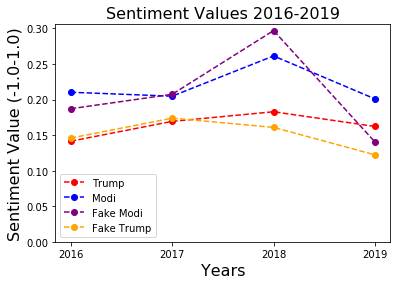

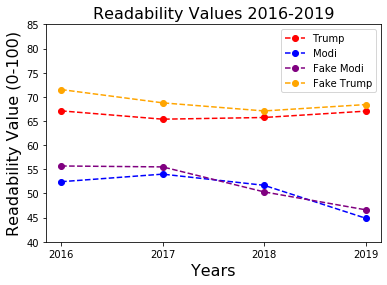

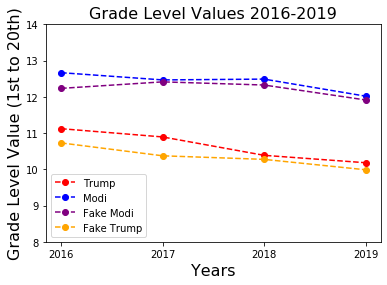

In [0]:
import numpy as np
import pandas as pd
import csv
import sys
import matplotlib.pyplot as plt

# ==============================================================
# TRUMP REAL 2016 Data
dfGrade = pd.read_csv("TrumpTweets2016Analysis_REAL.csv")
bottom = dfGrade.tail(1)
print(bottom)
sentiment2016 = bottom["Sentiment"].item()
readability2016 = bottom["Readability"].item()
gradeLevel2016 = bottom["Grade Level"].item()
# ==============================================================
# TRUMP REAL 2017 Data
dfGrade = pd.read_csv("TrumpTweets2017Analysis_REAL.csv")
bottom = dfGrade.tail(1)
print(bottom)
sentiment2017 = bottom["Sentiment"].item()
readability2017 = bottom["Readability"].item()
gradeLevel2017 = bottom["Grade Level"].item()
# ==============================================================
# TRUMP REAL 2018 Data
dfGrade = pd.read_csv("TrumpTweets2018Analysis_REAL.csv")
bottom = dfGrade.tail(1)
print(bottom)
sentiment2018 = bottom["Sentiment"].item()
readability2018 = bottom["Readability"].item()
gradeLevel2018 = bottom["Grade Level"].item()
# ==============================================================
# TRUMP REAL 2019 Data
dfGrade = pd.read_csv("TrumpTweets2019Analysis_REAL.csv")
bottom = dfGrade.tail(1)
print(bottom)
sentiment2019 = bottom["Sentiment"].item()
readability2019 = bottom["Readability"].item()
gradeLevel2019 = bottom["Grade Level"].item()
# ==============================================================
# Modi REAL 2016 Data
dfGrade = pd.read_csv("ModiTweets2016Analysis_REAL.csv")
bottom = dfGrade.tail(1)
print(bottom)
Msentiment2016 = bottom["Sentiment"].item()
Mreadability2016 = bottom["Readability"].item()
MgradeLevel2016 = bottom["Grade Level"].item()
# ==============================================================
# Modi REAL 2017 Data
dfGrade = pd.read_csv("ModiTweets2017Analysis_REAL.csv")
bottom = dfGrade.tail(1)
print(bottom)
Msentiment2017 = bottom["Sentiment"].item()
Mreadability2017 = bottom["Readability"].item()
MgradeLevel2017 = bottom["Grade Level"].item()
# ==============================================================
# Modi REAL 2018 Data
dfGrade = pd.read_csv("ModiTweets2018Analysis_REAL.csv")
bottom = dfGrade.tail(1)
print(bottom)
Msentiment2018 = bottom["Sentiment"].item()
Mreadability2018 = bottom["Readability"].item()
MgradeLevel2018 = bottom["Grade Level"].item()
# ==============================================================
# Modi REAL 2019 Data
dfGrade = pd.read_csv("ModiTweets2019Analysis_REAL.csv")
bottom = dfGrade.tail(1)
print(bottom)
Msentiment2019 = bottom["Sentiment"].item()
Mreadability2019 = bottom["Readability"].item()
MgradeLevel2019 = bottom["Grade Level"].item()
# ==============================================================
#                      FAKE TWEETS
# ==============================================================
# ==============================================================
# TRUMP FAKE 2016 Data
dfGrade = pd.read_csv("TrumpTweets2016Analysis_FAKE.csv")
bottom = dfGrade.tail(1)
print(bottom)
Fakesentiment2016 = bottom["Sentiment"].item()
Fakereadability2016 = bottom["Readability"].item()
FakegradeLevel2016 = bottom["Grade Level"].item()
# ==============================================================
# TRUMP FAKE 2017 Data
dfGrade = pd.read_csv("TrumpTweets2017Analysis_FAKE.csv")
bottom = dfGrade.tail(1)
print(bottom)
Fakesentiment2017 = bottom["Sentiment"].item()
Fakereadability2017 = bottom["Readability"].item()
FakegradeLevel2017 = bottom["Grade Level"].item()
# ==============================================================
# TRUMP FAKE 2018 Data
dfGrade = pd.read_csv("TrumpTweets2018Analysis_FAKE.csv")
bottom = dfGrade.tail(1)
print(bottom)
Fakesentiment2018 = bottom["Sentiment"].item()
Fakereadability2018 = bottom["Readability"].item()
FakegradeLevel2018 = bottom["Grade Level"].item()
# ==============================================================
# TRUMP FAKE 2019 Data
dfGrade = pd.read_csv("TrumpTweets2019Analysis_FAKE.csv")
bottom = dfGrade.tail(1)
print(bottom)
Fakesentiment2019 = bottom["Sentiment"].item()
Fakereadability2019 = bottom["Readability"].item()
FakegradeLevel2019 = bottom["Grade Level"].item()
# ==============================================================
# ==============================================================
# Modi FAKE 2016 Data
dfGrade = pd.read_csv("ModiTweets2016Analysis_FAKE.csv")
bottom = dfGrade.tail(1)
print(bottom)
FakeMsentiment2016 = bottom["Sentiment"].item()
FakeMreadability2016 = bottom["Readability"].item()
FakeMgradeLevel2016 = bottom["Grade Level"].item()
# ==============================================================
# Modi FAKE 2017 Data
dfGrade = pd.read_csv("ModiTweets2017Analysis_FAKE.csv")
bottom = dfGrade.tail(1)
print(bottom)
FakeMsentiment2017 = bottom["Sentiment"].item()
FakeMreadability2017 = bottom["Readability"].item()
FakeMgradeLevel2017 = bottom["Grade Level"].item()
# ==============================================================
# Modi FAKE 2018 Data
dfGrade = pd.read_csv("ModiTweets2018Analysis_FAKE.csv")
bottom = dfGrade.tail(1)
print(bottom)
FakeMsentiment2018 = bottom["Sentiment"].item()
FakeMreadability2018 = bottom["Readability"].item()
FakeMgradeLevel2018 = bottom["Grade Level"].item()
# ==============================================================
# Modi FAKE 2019 Data
dfGrade = pd.read_csv("ModiTweets2019Analysis_FAKE.csv")
bottom = dfGrade.tail(1)
print(bottom)
FakeMsentiment2019 = bottom["Sentiment"].item()
FakeMreadability2019 = bottom["Readability"].item()
FakeMgradeLevel2019 = bottom["Grade Level"].item()
# ==============================================================
#=====================SENTIMENT=================================
x = [ 2016, 2017, 2018, 2019]

xi = list(range(len(x)))
y = [sentiment2016, sentiment2017, sentiment2018, sentiment2019]
my = [Msentiment2016, Msentiment2017, Msentiment2018, Msentiment2019]
Fakey = [Fakesentiment2016, Fakesentiment2017, Fakesentiment2018, Fakesentiment2019]
Fakemy = [FakeMsentiment2016, FakeMsentiment2017, FakeMsentiment2018, FakeMsentiment2019]
plt.plot(xi, y, marker = 'o', linestyle = '--', color = 'r', label = "Trump")
plt.plot(xi, my, marker = 'o', linestyle = '--', color = 'b', label = "Modi")
plt.plot(xi, Fakemy, marker = 'o', linestyle = '--', color = 'purple', label = "Fake Modi")
plt.plot(xi, Fakey, marker = 'o', linestyle = '--', color = 'orange', label = "Fake Trump")

plt.xticks(xi, x)
drange = np.arange(0, .35, step = .05)
plt.yticks(drange)
plt.xlabel("Years", fontsize = 16)
plt.ylabel("Sentiment Value (-1.0-1.0)", fontsize = 16)
plt.title("Sentiment Values 2016-2019", fontsize = 16)
plt.legend()
plt.savefig('SentimentGraph') 
plt.show()
#====================================================================
# #=====================READABILITY==================================

x = [ 2016, 2017, 2018, 2019]

xi = list(range(len(x)))
y = [readability2016, readability2017, readability2018, readability2019]
my = [Mreadability2016, Mreadability2017, Mreadability2018, Mreadability2019]
Fakey = [Fakereadability2016, Fakereadability2017, Fakereadability2018, Fakereadability2019]
Fakemy = [FakeMreadability2016, FakeMreadability2017, FakeMreadability2018, FakeMreadability2019]

plt.plot(xi, y, marker = 'o', linestyle = '--', color = 'r', label = "Trump")
plt.plot(xi, my, marker = 'o', linestyle = '--', color = 'b', label = "Modi")
plt.plot(xi, Fakemy, marker = 'o', linestyle = '--', color = 'purple', label = "Fake Modi")
plt.plot(xi, Fakey, marker = 'o', linestyle = '--', color = 'orange', label = "Fake Trump")


plt.xticks(xi, x)
drange = np.arange(40, 90, step = 5)
plt.yticks(drange)
plt.xlabel("Years", fontsize = 16)
plt.ylabel("Readability Value (0-100)", fontsize = 16)
plt.title("Readability Values 2016-2019", fontsize = 16)
plt.legend() 
plt.savefig('ReadabilityGraph')
plt.show()
#========================================================================
#===========================GRADELEVEL===================================
x = [ 2016, 2017, 2018, 2019]

xi = list(range(len(x)))
y = [gradeLevel2016, gradeLevel2017, gradeLevel2018, gradeLevel2019]
my = [MgradeLevel2016, MgradeLevel2017, MgradeLevel2018, MgradeLevel2019]
Fakey = [FakegradeLevel2016, FakegradeLevel2017, FakegradeLevel2018, FakegradeLevel2019]
Fakemy = [FakeMgradeLevel2016, FakeMgradeLevel2017, FakeMgradeLevel2018, FakeMgradeLevel2019]

plt.plot(xi, y, marker = 'o', linestyle = '--', color = 'r', label = "Trump")
plt.plot(xi, my, marker = 'o', linestyle = '--', color = 'b', label = "Modi")
plt.plot(xi, Fakemy, marker = 'o', linestyle = '--', color = 'purple', label = "Fake Modi")
plt.plot(xi, Fakey, marker = 'o', linestyle = '--', color = 'orange', label = "Fake Trump")


plt.xticks(xi, x)
drange = np.arange(8, 15, step = 1)
plt.yticks(drange)
plt.xlabel("Years", fontsize = 16)
plt.ylabel("Grade Level Value (1st to 20th)", fontsize = 16)
plt.title("Grade Level Values 2016-2019", fontsize = 16)
plt.legend() 
plt.savefig('GradeLevelGraph')
plt.show()


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
